# **Final**



**პრობლემა:**
ბანკს სჭირდება სესხის დეფოლტის რისკის შეფასება. არასწორი გადაწყვეტილება იწვევს ან პოტენციური მომხმარებლის დაკარგვას, ან ფინანსურ დანაკარგებს.

**ამოცანა:**
სესხის დეფოლტის ალბათობის, ანუ მომხმარებლის არგადამხდელობის რისკის პროგნოზირება ისეთი მახასიათებლების საფუძველზე, როგორიცაა შემოსავალი, დასაქმების სტაჟი, საკრედიტო ისტორია და სხვა.

**მეთოდი:** ლოგისტიკური რეგრესია




**1: მონაცემების წინასწარ დამუშავება**

In [ ]:
import pandas as pd

# მონაცემების ჩატვირთვა
df=pd.read_csv("BIT_56_grp1_Final_variant1_data.csv")
df_desc=pd.read_csv("BIT_56_grp1_Final_variant1_data_desc.csv")


# მონაცემთა ტიპები
print("მონაცემების ტიპები")
print(df.dtypes)
print(df_desc)


# ცარიელი მნიშვნელობები
print("\nცარიელი მნიშვნელობები")
print(df.isnull().sum())


მონაცემების ტიპები
income              float64
employment_years    float64
credit_score        float64
age                 float64
debt_ratio          float64
previous_loans        int64
education            object
employment_type      object
default               int64
dtype: object
         field_name                          description      type
0            income             თვიური შემოსავალი (ლარი)     float
1  employment_years              დასაქმების სტაჟი (წელი)     float
2      credit_score                       საკრედიტო ქულა     float
3               age                                ასაკი     float
4        debt_ratio         ვალის შეფარდება შემოსავალთან     float
5    previous_loans              წინა სესხების რაოდენობა       int
6         education                      განათლების დონე  category
7   employment_type                      დასაქმების ტიპი  category
8           default  დეფოლტის სტატუსი (1=დეფოლტი, 0=არა)    binary

ცარიელი მნიშვნელობები
income              0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# კატეგორიული მნიშვნელობები
categorical_columns = df.select_dtypes(include=['object']).columns

# კატეგორიული ცვლადების კოდირება (one-hot encoding)
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = ohe.fit_transform(df[categorical_columns])
categorical_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# ძველი კატეგორიული სვეტების წაშლა და ახალი კოდირებული მონაცემების დამატება
df = df.drop(columns=categorical_columns).reset_index(drop=True)
df = pd.concat([df, categorical_df], axis=1)

# სკალირება
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# default მნიშვნელობის დაფიქსვა
print(df["default"].unique())
df["default"] = (df["default"] > 0).astype(int)
print(df["default"].unique())


[-1.76500038  0.56657212]
[0 1]



**2: მოდელის აგება**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# სამიზნე ცვლადის და მახასიათებლების განსაზღვრა
y = df["default"]
X = df.drop(columns=["default"])

# მონაცემების გაყოფა საწვრთნელ და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ლოგისტიკური რეგრესიის მოდელის გაწვრთნა
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()


**3: მოდელის შეფასება**


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

#გამოთვალე მოდელის სისწორე (accuracy), სიზუსტე (precision), მგრძნობელობა (recall) და F1 ქულა (F1 score) (1 ქულა)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.77
Precision: 0.7912087912087912
Recall: 0.9473684210526315
F1 Score: 0.8622754491017964


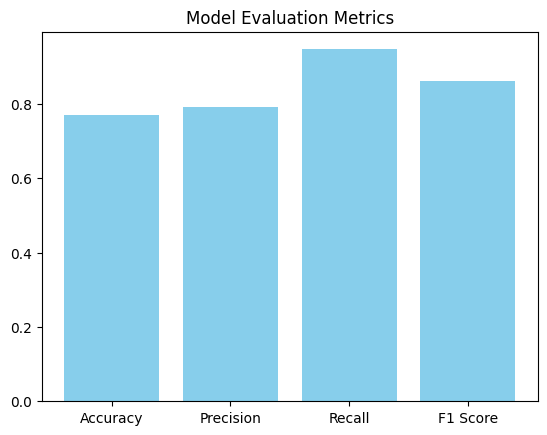

In [ ]:
import matplotlib.pyplot as plt

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.bar(metric_names, metrics,color="skyblue")
plt.title("Model Evaluation Metrics")
plt.show()


**კოეფიციენტების მნიშვნელობა**

- **Accuracy (0.77)**: 77%-იანი სისწორე, რაც ნიშნავს, რომ მოდელი სწორია 77% შემთხვევაში.

- **Precision (0.79):** 79.1%-იანი სიზუსტე, რაც ნიშნავს, რომ მოდელი სწორად პროგნოზირებს დადებით შედეგს (ჩვენს შემთხვევაში default-ს) 79.1% შემთხვევებში.

- **Recall (0.95):** 94.7%-იანი მგრძნობელობა, რაც ნიშნავს, რომ მოდელი 94.7%-ში სწორად ამოიცნობს ყველა დეფოლტს.

- **F1 Score (0.86):** კარგი ბალანსი სიზუსტესა და მგრძნობელობას შორის, 0.86-მდე F1 Score მიანიშნებს, რომ მოდელი კარგად მუშაობს ორივე მაჩვენებლზე.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

gini_coefficient = 2 * roc_auc - 1
print(f"Gini Coefficient: {gini_coefficient}")


ROC-AUC: 0.7698739035087719
Gini Coefficient: 0.5397478070175439


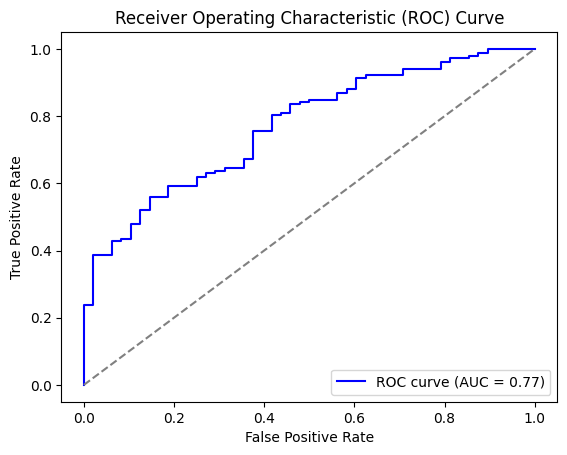

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, color='blue', label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- **ROC-AUC (0.77):** ეს ნიშნავს, რომ მოდელი დეფოლტებს და არადეფოლებს განასხვავებს 77% სიზუზსტით.(რაც უფრო მაღალია მაჩვენებელი, მით უფრო კარგია მოდელი)
   - მაღალი AUC (>0.8) ნიშნავს, რომ მოდელი კარგად არჩევს გადამხდელებს და არგადამხდელებს.
   - დაბალი AUC (<0.6) ნიშნავს, რომ მოდელი არაეფექტურია და გაუმჯობესებას საჭიროებს.

- **Gini Coefficient (0.54):** ეს ნიშნავს, რომ  მოდელი გარკვეულწილად არჩევს დეფოლტებს და არადეფოლტებს, მაგრამ შეიძლება გაუმჯობესდეს.




**4: აღრევის მატრიცა (confusion matrix) და ალბათობების განაწილება**


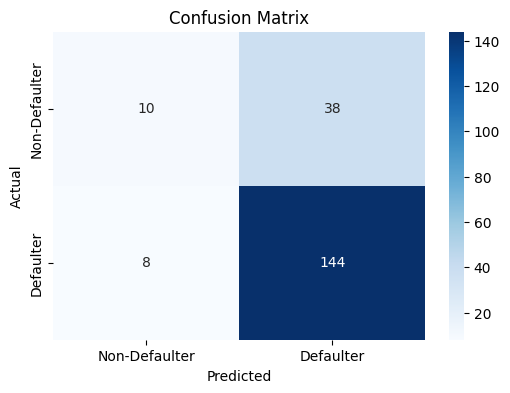

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)

# 1. აღრევის მატრიცის გამოთვლა
cm = confusion_matrix(y_test, y_pred)

# 2. აღრევის მატრიცის გრაფიკული გამოსახვა
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- **True Negatives** (სწორად პროგნოზირებული არაგადამხდელი) - 10
- **False Positives**  (არაგადამხდელი პროგნოზირებული, როგორც გადამხდელი): 38
- **False Negatives** (გადამხდელი პროგნოზირებული, როგორც არაგადამხდელი): 8
- **True Positives** (სწორად პროგნოზირებული გადამხდელი): 144

<ipython-input-56-48fe89ac9695>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['default'] == 1]['credit_score'], label='Defaulters', shade=True,color="teal")
<ipython-input-56-48fe89ac9695>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['default'] == 0]['credit_score'], label='Non-Defaulters', shade=True,color="pink")


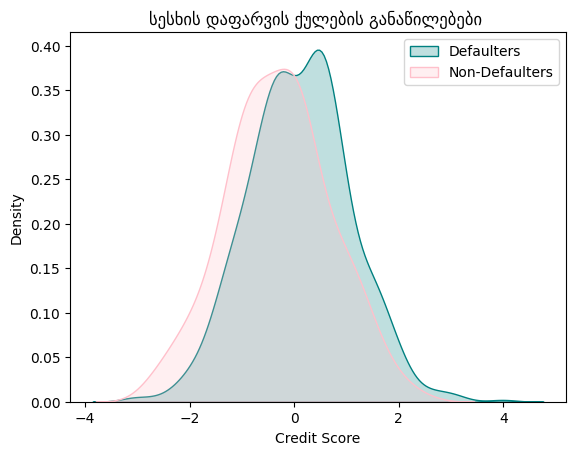

In [ ]:
#  გადამხდელთა და არგადამხდელთა განაწილებები
sns.kdeplot(df[df['default'] == 1]['credit_score'], label='Defaulters', shade=True,color="teal")
sns.kdeplot(df[df['default'] == 0]['credit_score'], label='Non-Defaulters', shade=True,color="pink")
plt.title('სესხის დაფარვის ქულების განაწილებები ')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

**საკრედიტო ქულების განაწილების მიხედვით**

- არის მნიშვნელოვანი გადაფარვა ორ განაწილებას შორის.
- გადამხდელებს აქვთ ოდნავ მაღალი საკრედიტო ქულები (ცენტრირებული 0-დან 1-მდე).
- არაგადამხდელებს აქვთ ოდნავ დაბალი საკრედიტო ქულები (ცენტრირებული -1-დან 0-მდე).
- **გადაფარვა ართულებს იდეალური გადაწყვეტილების საზღვრის პოვნას**

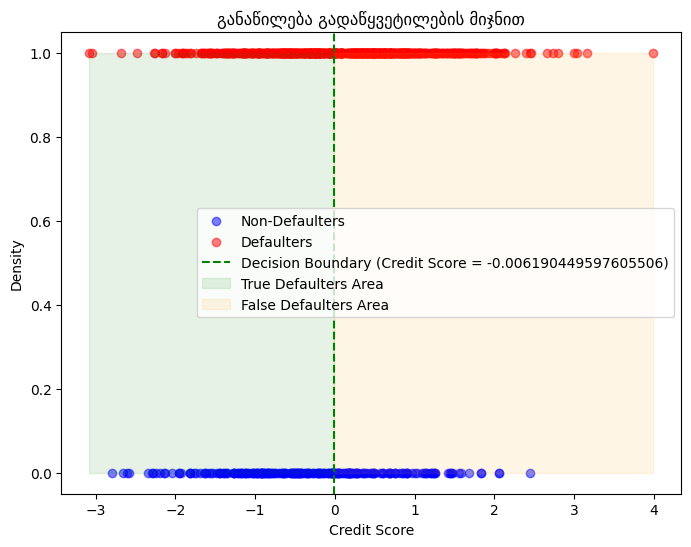

In [ ]:
# გადაწყვეტილების ზღვრის გაბმა
plt.figure(figsize=(8, 6))

# ქულები ვს
plt.scatter(df[df['default'] == 0]['credit_score'], np.zeros_like(df[df['default'] == 0]['credit_score']), label='Non-Defaulters', color='blue', alpha=0.5)
plt.scatter(df[df['default'] == 1]['credit_score'], np.ones_like(df[df['default'] == 1]['credit_score']), label='Defaulters', color='red', alpha=0.5)

# გადაწყვეტილების მიჯნა
decision_boundary = np.median(df['credit_score'])
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision Boundary (Credit Score = {decision_boundary})')

plt.fill_betweenx([0, 1], df['credit_score'].min(), decision_boundary, color='green', alpha=0.1, label='True Defaulters Area')
plt.fill_betweenx([0, 1], decision_boundary, df['credit_score'].max(), color='orange', alpha=0.1, label='False Defaulters Area')

plt.title('განაწილება გადაწყვეტილების მიჯნით')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

**გრაფიკი გვიჩვენებს საკრედიტო სქორინგის მოდელის კლასიფიკაციას, სადაც:**

- წითელი წერტილები არის გადამხდელები, ლურჯი - არაგადამხდელები
- ვერტიკალური წყვეტილი ხაზი (-0.00619) არის გადაწყვეტილების მიჯნა
- მარცხენა (მწვანე) არე მიუთითებს სავარაუდო გადამხდელებზე
- მარჯვენა (ნარინჯისფერი) არე მიუთითებს სავარაუდო არაგადამხდელებზე

წერტილების გადაფარვა მიუთითებს, რომ მოდელი არ არის სრულყოფილი და შეიცავს კლასიფიკაციის შეცდომებს.


**5: შედეგების ინტერპრეტაცია**


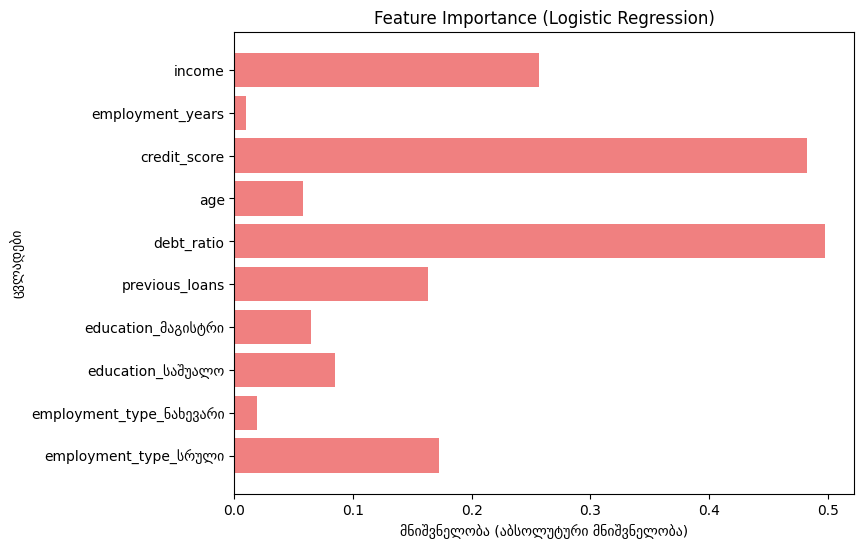

In [ ]:
feature_importance = np.abs(model.coef_[0])
features = X.columns

# სვეტოვანი დიაგრამის აგება
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='lightcoral')
plt.xlabel("მნიშვნელობა (აბსოლუტური მნიშვნელობა)")
plt.ylabel("ცვლადები")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


როგორც უკვე აღვნიშნე:
- ROC-AUC ქულა - 0.77 მიუთითებს, რომ მოდელი საშუალოზე უკეთესია, მაგრამ შეიძლება გაუმჯობესდეს.
- Gini = 0.54, რაც ნიშნავს, რომ მოდელი გარკვეულწილად არჩევს დეფოლტებს და არადეფოლტებს, მაგრამ უკეთესი ალგორითმებით შეიძლება გაუმჯობესდეს.

დიაგრამა გვიჩვენებს უნიმოდალურ განაწილებას როგორც გადამხდელებისთვის, ისე არგადამხდელებისთვის. თითოეულ ჯგუფს აქვს ერთი გამოხატული პიკი, რაც იმას ნიშნავს, რომ მონაცემები ერთ ცენტრალურ მნიშვნელობასთან  "გროვდება".

- განაწილებები მნიშვნელოვნად იფარება, ამიტომ  გადაფარვა ართულებს მკაფიო ზღვრის დადგენას, რომელიც მხოლოდ საკრედიტო ქულის საფუძველზე გამოყოფს გადამხდელებს არგადამხდელებისგან.

